In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [71]:
cust_acq=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Case Study 2 - Credit Card/Customer Acqusition.csv')
spend=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Case Study 2 - Credit Card/spend.csv')
repayment=pd.read_csv('/Users/arunbiretheesh/Desktop/DATA SCIENCE/CASE STUDY/Case Study 2 - Credit Card/Repayment.csv')

In [72]:
repayment.drop(columns=['Unnamed: 4','SL No:'],inplace=True)

In [73]:
repayment.dropna(axis=0,inplace=True)

In [74]:
repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [75]:
cust_acq.drop(columns=['No'],inplace=True)

In [76]:
spend.drop(columns=['Sl No:'],inplace=True)

In [141]:
spend['Month']=pd.to_datetime(spend['Month'],format='%d-%b-%y')
repayment['Month']=pd.to_datetime(repayment['Month'],format='%d-%b-%y')

In [142]:
#1. In the above dataset,
#a. In case age is less than 18, replace it with mean of age values.
cust_acq.loc[cust_acq.Age<18]=cust_acq.Age.mean()


In [143]:
#b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)
cust_spend=pd.merge(left=cust_acq,right=spend,on='Customer',how='inner')

In [389]:
cust_spend.loc[cust_spend.Amount>cust_spend.Limit,'Amount']=cust_spend.Limit/2
cust_spend

In [147]:
#c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

cust_repay=pd.merge(left=cust_acq,right=repayment,on='Customer',how='inner')


In [149]:
cust_repay.loc[cust_repay.Amount>cust_repay.Limit,'Amount']=cust_repay.Limit

In [150]:
cust_repay

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1425,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1426,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1427,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1428,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [151]:
#2. From the above dataset create the following summaries: 
#a. How many distinct customers exist?
cust_spend.Customer.nunique()

94

In [152]:
cust_repay.Customer.nunique()

94

In [387]:
#b. How many distinct categories exist?
cust_spend.Product.value_counts().count()

1430

In [388]:
cust_repay.Product.value_counts().count()

3

In [198]:
#c. What is the average monthly spend by customers?


In [171]:
avg=cust_spend.groupby(['Customer','Month'])['Amount'].mean().reset_index()

In [195]:
avg['spend_month']=avg.Month.apply(lambda x:x.month)

In [199]:
avg_spend=avg.groupby(['Customer','spend_month'])['Amount'].mean().reset_index()
avg_spend

,Customer,spend_month,Amount
0,A1,1,341332.87700
1,A1,2,138421.15125
2,A1,4,261649.25000
3,A1,5,361141.31000
4,A1,8,344372.10000
...,...,...,...
545,A95,1,240401.50000
546,A96,1,54729.66000
547,A97,1,5000.00000
548,A98,1,5000.50000


In [200]:
#d. What is the average monthly repayment by customers?

In [208]:
average=cust_repay.groupby(['Customer','Month'])['Amount'].mean().reset_index()

In [213]:
average['repay_month']=average.Month.apply(lambda x:x.month)
avg_repay=average.groupby(['Customer','repay_month'])['Amount'].mean().reset_index()
avg_repay

,Customer,repay_month,Amount
0,A1,1,325723.331
1,A1,2,137713.785
2,A1,4,254474.580
3,A1,7,297176.740
4,A1,9,186427.500
...,...,...,...
526,A95,1,369405.960
527,A96,1,100000.000
528,A97,1,10000.000
529,A98,1,10001.000


In [ ]:
#e. If the monthly rate of interest is 2.9%, 
#what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [226]:
avg_cust=pd.merge(left=avg_spend,right=avg_repay,left_on=['Customer','spend_month'],right_on=['Customer','repay_month'],how='inner')

In [235]:
avg_cust['monthly_profit']=avg_cust.Amount_y-avg_cust.Amount_x
avg_cust['profit']=np.where(avg_cust['monthly_profit']>0,avg_cust['monthly_profit']*2.9/100,np.nan)
avg_cust

,Customer,spend_month,Amount_x,repay_month,Amount_y,profit,monthly_profit
0,A1,1,341332.87700,1,325723.331000,NaN,-15609.546000
1,A1,2,138421.15125,2,137713.785000,NaN,-707.366250
2,A1,4,261649.25000,4,254474.580000,NaN,-7174.670000
3,A1,11,183839.61000,11,285729.090000,2954.794920,101889.480000
4,A10,1,173828.28250,1,283324.721667,3175.396736,109496.439167
...,...,...,...,...,...,...,...
426,A95,1,240401.50000,1,369405.960000,3741.129340,129004.460000
427,A96,1,54729.66000,1,100000.000000,1312.839860,45270.340000
428,A97,1,5000.00000,1,10000.000000,145.000000,5000.000000
429,A98,1,5000.50000,1,10001.000000,145.014500,5000.500000


In [233]:
#f. What are the top 5 product types?

In [260]:
cust_spend.groupby(['Type'])['Amount'].sum().sort_values(ascending=False).reset_index().loc[0:4]

,Type,Amount
0,PETRO,27592366.41
1,CAMERA,25071444.58
2,FOOD,19030750.17
3,TRAIN TICKET,18986955.39
4,AIR TICKET,18031730.82


In [ ]:
#g. Which city is having maximum spend?

In [266]:
cust_spend.groupby(['City'])['Amount'].sum().sort_values(ascending=False).reset_index().loc[0]

City        CALCUTTA
Amount    41108132.3
Name: 0, dtype: object

In [ ]:
#h. Which age group is spending more money?

In [294]:
age=cust_spend.groupby(['Age'])['Amount'].sum().reset_index()

In [307]:
age['Age_group']=pd.cut(age.Age,[18,25,65,80],labels=['young','middle_age','Seniors'])

In [312]:
age.groupby(['Age_group'])['Amount'].sum().sort_values(ascending=True).reset_index().loc[1]


Age_group       Seniors
Amount       37506828.2
Name: 1, dtype: object

In [313]:
#i. Who are the top 10 customers in terms of repayment?

In [317]:
cust_repay.groupby('Customer')['Amount'].sum().sort_values(ascending=False).reset_index().iloc[0:10]

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A44,7744730.12
7,A39,7622483.30
8,A42,7615460.86
9,A38,7470956.35


In [ ]:
#3 . Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [383]:
yearly=cust_spend.groupby(['City','Product','Month'])['Amount'].sum().reset_index()
yearly['Year']=yearly.Month.apply(lambda x:x.year)
year_spend=pd.pivot_table(data=yearly,index='City',columns=['Product','Year'],values='Amount',aggfunc='sum')
year_spend


Product           Gold                              Platimum              \
Year              2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   7460145.61   8706615.03   9582502.52  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   706804.44   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10234260.11  2199994.82  1278274.70   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
Year              2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       967129.51   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      2748735.38   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   200002.00  269912.99   505862.12

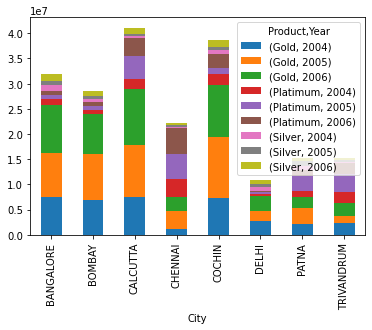

In [341]:
year_spend.plot(kind='bar',stacked=True)
plt.show()

In [ ]:
#4. Create graphs for
#a. Monthly comparison of total spends, city wise

In [347]:
monthly=cust_spend.groupby(['City','Month'])['Amount'].sum().reset_index()
monthly['Month']=monthly.Month.apply(lambda x:x.month)
monthly_spend=pd.pivot_table(data=monthly,index='City',columns=['Month'],values='Amount',aggfunc='sum')

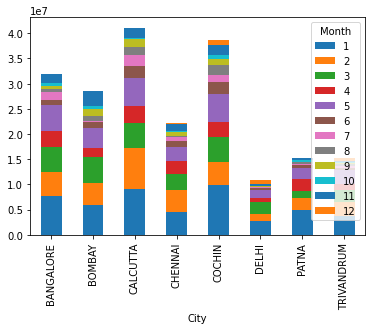

In [349]:
monthly_spend.plot(kind='bar',stacked=True)
plt.show()

In [ ]:
#b. Comparison of yearly spend on air tickets

In [362]:
air_tick=cust_spend.loc[cust_spend.Type=='AIR TICKET',['Month','Type','Amount']]
air_tick['Year']=air_tick.Month.apply(lambda x:x.year)
air_yearly=pd.pivot_table(data=air_tick,index='Year',columns=['Type'],values='Amount',aggfunc='sum')
air_yearly

Type,AIR TICKET
Year,
2004,3882511.22
2005,9284651.23
2006,4864568.37


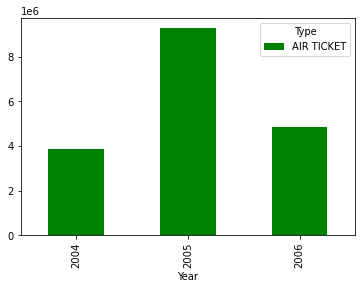

In [361]:
air_yearly.plot(kind='bar',color='green')
plt.show()

In [ ]:
# c.Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

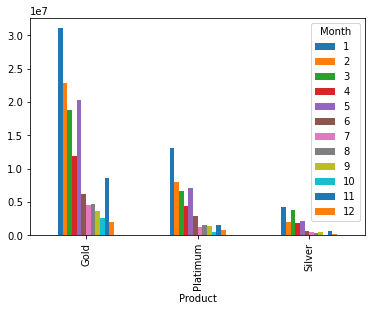

In [382]:
prod_monthly=cust_spend.groupby(['Product','Month'])['Amount'].sum().reset_index()
prod_monthly['Month']=prod_monthly.Month.apply(lambda x:x.month)
prod=pd.pivot_table(data=prod_monthly,index=['Product'],columns=['Month'],values='Amount',aggfunc='sum')
prod.plot(kind='bar')
plt.show()


In [ ]:
#5. Write user defined PYTHON function to perform the following analysis:
#You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [370]:
cust_repay['yearly']=cust_repay.Month.apply(lambda x:x.year)
cust_repay['monthly']=cust_repay.Month.apply(lambda x:x.month)

In [378]:
def top10_cust(product_cat,time_period):
    product_cat=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
    time_period=str(input('Please Enter Time Period and time period should be in yearly/monthly: '))

    return cust_repay.loc[cust_repay.Product==product_cat].groupby(['Customer','City','Product',time_period])['Amount'].sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [379]:
top10_cust(product_cat,time_period)

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Silver
Please Enter Time Period and time period should be in yearly/monthly: monthly


,Customer,City,Product,monthly,Amount
16,A22,BOMBAY,Silver,1,900000.00
57,A46,PATNA,Silver,1,713614.32
105,A8,PATNA,Silver,1,600012.00
3,A18,BANGALORE,Silver,3,600000.00
85,A6,DELHI,Silver,1,600000.00
91,A7,COCHIN,Silver,1,594009.28
47,A25,COCHIN,Silver,1,586332.08
67,A57,TRIVANDRUM,Silver,3,578549.42
51,A25,COCHIN,Silver,5,572616.74
58,A46,PATNA,Silver,2,544231.79
